# DSM_0508
## 主題: 機器學習(2) - 迴歸、SVM、決策樹、隨機森林
### 專案目標: 
-



Host: Isaac

Time: 2025/05/08
參考書目: 精通機器學習｜使用 Scikit-Learn , Keras 與 TensorFlow, 2/e


關鍵字: 



## 1. 線性回歸

### 1.1 訓練線性回歸（Linear Regression）模型主要方法


- **第一種方法：Closed-form（封閉解法）** (用數學公式直接解出來)

這種方法是透過數學公式，**一次性計算出最佳的模型參數**，也就是讓訓練資料的誤差（成本函數）最小的那一組參數。這種方式不需要反覆試誤，效率高，但在資料量很大的時候會比較吃力。

- **第二種方法：Gradient Descent（梯度下降法）** (用優化演算法慢慢找)

    這是一種**迭代式的最佳化方法**。它會根據目前模型在訓練資料上的誤差，逐步調整模型的參數，慢慢讓模型的誤差降低，最終達到和第一種方法相同的結果。

    * 批次梯度下降（Batch GD）
    * 小批次梯度下降（Mini-batch GD）
    * 隨機梯度下降（Stochastic GD）




### 一、線性回歸是什麼？

線性回歸是一種**用直線預測數字的方法**。舉個例子：

假設你想根據一個人的 **收入（x）** 來預測他的 **生活滿意度（y）**。

你可以畫一條直線，試著讓它**盡量貼近這些人的資料點**，這條直線的公式可能長這樣：

$$
y = \theta_0 + \theta_1 \cdot x
$$

其中：

* $y$：你想預測的數值（例如生活滿意度）
* $x$：輸入的特徵（例如收入）
* $\theta_0$：直線的截距（bias，當 $x=0$ 時 $y$ 是多少）
* $\theta_1$：直線的斜率（也就是 $x$ 每多 1，$y$ 增加多少）

這就是一元一次方程式，對吧？這就是最簡單的線性回歸。

### 二、如果有很多變數呢？

如果你不只考慮收入，還考慮年齡、工作時數、學歷等因素，那就會變成這樣的公式：

$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

這時候我們就會用**向量**來簡寫：

* 把所有的輸入特徵放進一個向量 $\mathbf{x}$：

  $$
  \mathbf{x} = \begin{bmatrix}1 \\ x_1 \\ x_2 \\ \vdots \\ x_n\end{bmatrix}
  $$

  （第一個 1 是為了對應 $\theta_0$）

* 把所有參數放進另一個向量 $\boldsymbol{\theta}$：

  $$
  \boldsymbol{\theta} = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n\end{bmatrix}
  $$

這時候模型就可以簡寫成：

$$
\hat{y} = \boldsymbol{\theta}^T \cdot \mathbf{x}
$$

這就是「向量內積」


### 三、我們的目標：找出「最好的那一組 $\boldsymbol{\theta}$」

有了模型後，真正的問題是：

`怎麼知道哪條線最能貼近資料？`

我們會定義一個「誤差公式」來衡量模型預測得好不好。最常用的誤差叫做：

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
$$

意思是：把每個預測值與實際值的差距平方後，加總平均。

接下來我們就要想辦法「**最小化這個誤差**」，找出一組 $\boldsymbol{\theta}$ 讓這個誤差最低。


### 四、怎麼找出最佳參數？

有兩種方式可以做到這件事：

1. **用數學公式直接解（closed-form）**：
   適合資料量小，可以直接解出 $\boldsymbol{\theta}$。

2. **用反覆調整的方式（梯度下降 Gradient Descent）**：
   像是在山谷中走來走去，找到最深的地方（最小誤差）。這種方式適合資料量大、變數多。

## 小結

* 線性回歸就是畫一條線來預測數字。
* 當變數多時，我們會用向量來表示輸入與參數。
* 我們的目標是找到那條最貼近資料的線，也就是最小化誤差。
* 可以用數學解法或優化演算法來做到這件事。


### 正規方程式（Normal Equation）求解線性回歸模型的最佳參數 $\theta$

## 一、問題設定

你有一堆資料，每筆資料長這樣：

$$
\mathbf{x}^{(i)} = [1, x_1^{(i)}, x_2^{(i)}, \dots, x_n^{(i)}]
\quad \text{對應的標籤是} \quad y^{(i)}
$$

總共有 $m$ 筆資料，每筆有 $n$ 個特徵（不含常數項）。

我們想要找出參數向量 $\boldsymbol{\theta}$，讓預測值：

$$
\hat{y}^{(i)} = \boldsymbol{\theta}^T \mathbf{x}^{(i)}
$$

**盡可能貼近真實的 $y^{(i)}$**。


## 二、矩陣形式

把所有訓練資料組成一個矩陣：

$$
X =
\begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
\end{bmatrix}
\quad \text{（尺寸：} m \times (n+1)\text{）}
$$

對應的真實標籤放成向量：

$$
\mathbf{y} =
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{bmatrix}
\quad \text{（尺寸：} m \times 1\text{）}
$$

## 三、MSE 損失函數（用矩陣表示）

我們要最小化：

$$
MSE(\boldsymbol{\theta}) = \frac{1}{m} \| X \boldsymbol{\theta} - \mathbf{y} \|^2
$$

這裡的意思是「模型預測值 $X \boldsymbol{\theta}$ 跟真實值 $\mathbf{y}$ 差多少」。

## 四、正規方程式（Normal Equation）

你可以透過計算導數並令其為 0，推導出最佳的 $\boldsymbol{\theta}$ 應滿足以下公式：

$$
\boldsymbol{\theta} = (X^T X)^{-1} X^T \mathbf{y}
$$

這就是**正規方程式**，也稱為**解析解（closed-form solution）**。


## 五、使用方式與注意事項

1. 優點：

   * 一次性直接算出來，**不需要反覆更新參數**。
   * 效率高、準確度佳（適合變數不多、資料不大時）。

2. 缺點：

   * $X^T X$ 的反矩陣（inverse）可能不存在或難以計算。
   * 若特徵很多或資料筆數很大，計算複雜度高（尤其是反矩陣計算）。

## 六、簡單數值範例（2 筆資料、1 個特徵）

假設我們有：

$$
X =
\begin{bmatrix}
1 & 1 \\
1 & 2
\end{bmatrix}
,\quad
\mathbf{y} =
\begin{bmatrix}
2 \\
3
\end{bmatrix}
$$

那就代入公式：

1. $X^T X = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}^T \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix} = \begin{bmatrix} 2 & 3 \\ 3 & 5 \end{bmatrix}$

2. $X^T y = \begin{bmatrix} 1 & 1 \\ 1 & 2 \end{bmatrix}^T \begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 5 \\ 8 \end{bmatrix}$

3. 最後計算：

$$
\boldsymbol{\theta} = (X^T X)^{-1} X^T y = \begin{bmatrix} 2 & 3 \\ 3 & 5 \end{bmatrix}^{-1} \begin{bmatrix} 5 \\ 8 \end{bmatrix}
$$

這樣就可以算出最好的參數 $\boldsymbol{\theta}$。



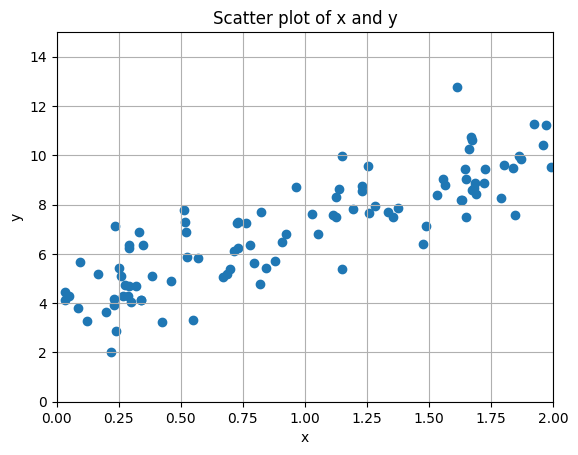

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of x and y")
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

接著用正規方程式來計算線性回歸的參數 $\theta$，使用 `numpy` 的 `lstnalg` 模組來計算矩陣的反矩陣，並且使用 `numpy` 的 `dot` 函數來計算矩陣的乘法。



In [2]:
x_b = np.c_[np.ones((100, 1)), x]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

print("Theta best:", theta_best)

Theta best: [[3.95986392]
 [3.11940525]]


In [5]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]  # add x0 = 1 to each instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.95986392],
       [10.19867443]])

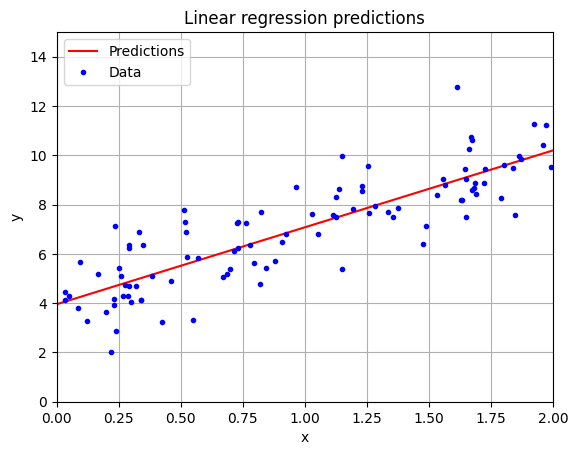

In [9]:
plt.plot(x_new, y_predict, "r-", label="Predictions")
plt.plot(x, y, "b.", label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear regression predictions")
plt.axis([0, 2, 0, 15])
plt.grid(True)
#調整圖例位置
plt.legend(loc="upper left")
plt.show()

用scikit-learn的`LinearRegression`來計算線性回歸的參數 $\theta$

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(x_new)

array([[ 3.95986392],
       [10.19867443]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[3.95986392],
       [3.11940525]])

梯度下降法（Gradient Descent）是一種優化演算法，用來尋找函數的最小值。它的基本原理是：從一個初始點開始，計算該點的梯度（即函數在該點的斜率），然後沿著梯度的反方向移動一小步，重複這個過程直到找到函數的最小值。

有幾種不同的梯度下降法，主要區別在於每次更新參數時使用的資料量：

#### 1. 批次梯度下降（Batch Gradient Descent）

想像你要把一張大地圖上的山谷找出來（最低點），你現在站在某個地方，手上有全部的地形資料，你看完整張地圖後，決定往哪個方向走，然後再移動一步。

* 每次都**看完整張地圖**才走一步。
* 所以方向很準，走得很穩。
* 但每次出發前都要花很久看整張地圖，很慢。

適合資料不多、你不趕時間的情況。

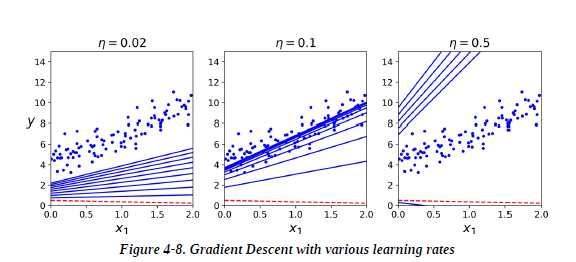

#### 2. 隨機梯度下降（Stochastic Gradient Descent, SGD）

這次你沒有整張地圖，只有每次能看一個地點。

你走一步之後，就用你那一格的地形判斷接下來往哪裡走。

* 每次**只看一小格**地圖就走。
* 好處是速度超快、隨走隨改。
* 壞處是容易亂走、路徑會抖來抖去。

適合資料超多的情況，也適合「即時更新」（像即時推薦系統）。

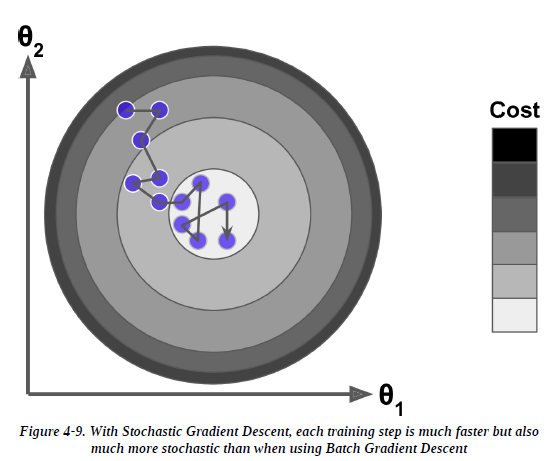

#### 3. 小批次梯度下降（Mini-batch GD）

這是前兩者的折衷版本。

你每次看**一小塊地圖（小批次）**，然後決定方向走一步。

* 看得不多不少，比較省時間。
* 比起一筆一筆算，走得比較穩。
* 比起整張地圖看，省記憶體又夠準。

這是現在**訓練 AI 模型最常用的方法**。



#### 4. 奇異值分解（SVD）

SVD 不像前面三個「一步步走」，它比較像：

你直接找出一個超級數學公式，**一次性就計算出最佳答案**，好像你一開始就知道山谷在哪裡。

* 不用走路（不用迭代），直接計算出結果。
* 非常精準，但需要複雜計算、佔用很多記憶體。
* 適合小型問題（資料不多）或要做理論分析時。

### 小結比喻整理

| 方法         | 地圖範圍      | 速度   | 穩定性 | 適合什麼人                 |
| ---------- | --------- | ---- | --- | --------------------- |
| BGD        | 每次看整張地圖   | 慢    | 很穩  | 資料少、想精準慢慢來的人          |
| SGD        | 每次看一格地圖   | 非常快  | 抖動多 | 資料超大、想即時學習的人          |
| Mini-batch | 每次看一小塊地圖  | 適中   | 穩定  | 現代 AI 模型最常見方式         |
| SVD        | 不走路、直接算答案 | 不需要走 | 超穩  | 需要理論解、資料不多、做報告或數學分析的人 |


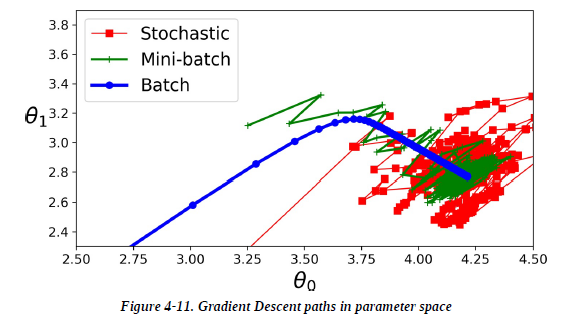

## 多項式線性回歸
多項式線性回歸（Polynomial Linear Regression）是線性回歸的一種擴展，允許我們使用多項式來擬合資料。這意味著我們可以用更複雜的曲線來描述資料，而不僅僅是直線。
這對於資料中存在非線性關係的情況特別有用。多項式線性回歸的基本思想是將輸入特徵轉換為多項式形式，然後使用線性回歸模型來擬合這些轉換後的特徵。

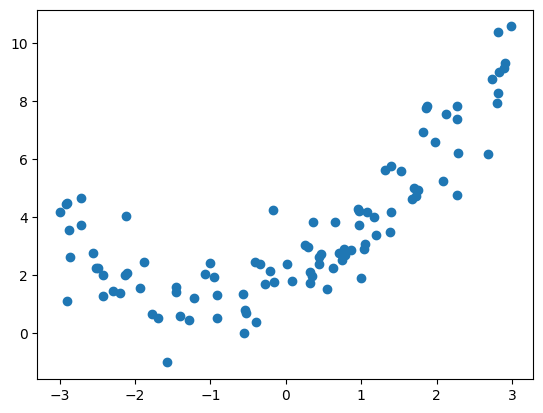

In [12]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)

直線絕對沒辦法擬合資料，這時候就需要用到sklearn的`PolynomialFeatures`來將資料轉換成多項式的形式，然後再用線性回歸模型來擬合這些轉換後的特徵。


In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
x[0]
X_poly[0]

array([-0.91253463,  0.83271945])

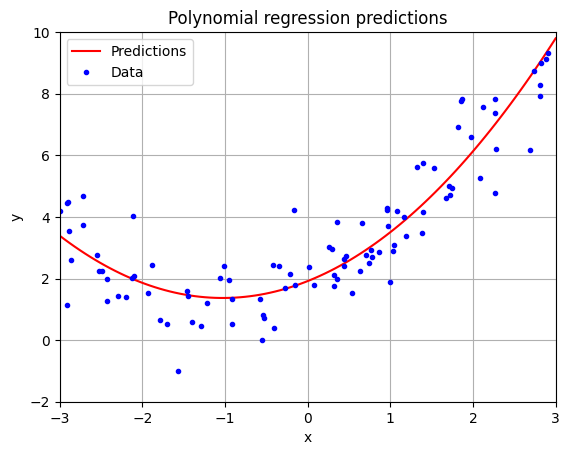

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# Plotting the model predictions
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.plot(X, y, "b.", label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial regression predictions")
plt.axis([-3, 3, -2, 10])   
plt.grid(True)
plt.legend(loc="upper left")
plt.show()



### 一、什麼是學習曲線？

學習曲線通常是畫出：

* **訓練誤差（Training Error）**
* **驗證誤差（Validation Error）**

這兩條線，隨著「訓練資料量」變化的趨勢。

這樣我們可以看出：

* 模型是否有學到東西（Training Error 有沒有下降）
* 學到的東西能不能用在新資料上（Validation Error 有沒有趨於穩定）


### 二、加入多項式會怎樣？

多項式迴歸中，你可以調整**階數（degree）**，這其實就是調整「模型的複雜度」。不同階數下，學習曲線會長得非常不同：


#### 1. **多項式階數太低（模型太簡單） → 欠擬合 Underfitting**

* 訓練誤差高：模型連訓練資料都學不好
* 驗證誤差也高：當然也不會泛化
* 學習曲線兩條線都很高，而且彼此靠得很近

這代表模型太「笨」，太簡單，畫不出資料的趨勢。


#### 2. **多項式階數適中 → 最佳平衡**

* 訓練誤差適中，驗證誤差最低
* 學習曲線顯示兩條線都往下，並趨於收斂

這是我們希望的狀況，模型有能力學會資料趨勢，也能泛化到新資料。


#### 3. **多項式階數太高（模型太複雜） → 過擬合 Overfitting**

* 訓練誤差非常低：模型幾乎完全記住資料
* 驗證誤差很高：泛化能力差
* 學習曲線兩條線「差距大」：訓練誤差低、驗證誤差高

這代表模型太「聰明」，連雜訊都學起來，導致新資料預測效果差。



### 三、圖像式理解（簡化）

| 階數 | Training Error | Validation Error | 解釋   |
| -- | -------------- | ---------------- | ---- |
| 1  | 高              | 高                | 欠擬合  |
| 3  | 適中             | 低                | 正常學習 |
| 10 | 很低             | 高                | 過擬合  |


### 四、如何搭配學習曲線用多項式回歸？

1. **用多項式階數當作控制模型複雜度的「超參數」**
2. **畫出不同階數下的學習曲線**
3. **觀察何時驗證誤差最低、何時過擬合出現**
4. **挑出最平衡的階數（bias-variance tradeoff）**

這就叫做**用學習曲線來幫助選擇最合適的多項式階數**。


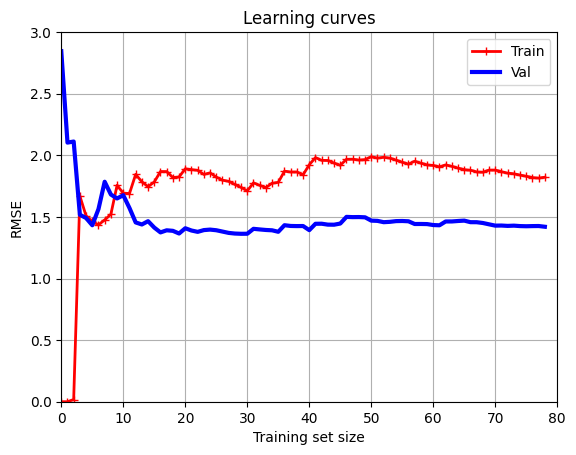

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Learning curves")
    plt.legend()
    plt.axis([0, 80, 0, 3])
    plt.grid(True)
    plt.show()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### Bias/Variance Trade-off（偏差與變異的權衡）

#### 一、什麼是 Bias（偏差）？

* 指的是模型「看錯方向」的誤差。
* 如果模型太簡單（例如你用一條直線去擬合一個彎曲的資料），那你永遠都學不到真正的趨勢。
* **高偏差模型**常見特徵：

  * 預測不準
  * 訓練誤差高
  * 欠擬合（Underfitting）


#### 二、什麼是 Variance（變異）？

* 指的是模型太敏感於訓練資料的小變動。
* 如果模型太複雜（例如你用 10 次多項式去擬合只有 5 筆資料），那它可能把每個小變化都當作重要特徵記住，導致學到的東西沒辦法泛化。
* **高變異模型**常見特徵：

  * 訓練資料表現非常好
  * 驗證資料表現很差
  * 過擬合（Overfitting）


#### 三、什麼是 Irreducible Error（不可消除的誤差）？

* 是因為資料本身有雜訊、缺漏、錯誤所造成的誤差。
* 不管你用什麼模型都沒辦法完全消除，唯一方法是改善資料品質。

#### 四、為什麼叫做 Trade-off？

因為**模型複雜度↑ → 偏差↓，但變異↑**；反之亦然。

你沒辦法兩邊都拿到好處：

* 模型太簡單 → 高偏差、低變異
* 模型太複雜 → 低偏差、高變異

所以你要「在偏差與變異之間找到一個平衡點」，這就是所謂的 **Bias-Variance Trade-off**。


#### 五、怎麼跟多項式迴歸、學習曲線搭起來？

當你調整**多項式的階數**時，你其實就是在調整模型的複雜度：

| 階數 | 偏差 (Bias) | 變異 (Variance) | 模型情況 |
| -- | --------- | ------------- | ---- |
| 1  | 高         | 低             | 欠擬合  |
| 3  | 中         | 中             | 最佳平衡 |
| 10 | 低         | 高             | 過擬合  |

畫出學習曲線後，你就可以「視覺化」這個 trade-off，幫助你決定使用幾階的多項式最合適。



## 含正規化的線性模型
正規化（Regularization）是用來防止模型過擬合的一種技術。它的基本思想是：在損失函數中加入一個懲罰項，這個懲罰項會隨著模型參數的增大而增大，從而限制模型的複雜度。這樣可以讓模型在訓練資料上表現得更好，但在驗證資料上表現得更差。正規化的主要目的是減少模型的變異性，提高模型的泛化能力。常見的正規化方法有 L1 正規化(Lasso Regression)和 L2 正規化(Ridge Regression)。

模型的自由度（degree of freedom）是指模型能夠學習的參數數量。自由度越高，模型就越複雜，能夠擬合的資料就越多，但同時也容易過擬合。正規化可以幫助我們控制模型的自由度，從而提高模型的泛化能力。

對於線性模型來說，正規化的做法是約束模型的權重。

### Lasso 迴歸 (Lasso Regression) L1 正規化


#### 1. 損失函數：

$$
J(\boldsymbol{\theta}) = \text{MSE} + \lambda \sum_{j=1}^{n} |\theta_j|
$$

* 這裡的懲罰是對參數的「絕對值」。
* 不像平方，**對小的參數也施加壓力**。

#### 2. 效果

* 很容易把某些參數「直接壓成 0」。
* 適合用來做**特徵選擇**：只保留重要變數，其餘剔除。

#### 3. 幾何直覺

* 在參數空間中，L1 的懲罰項是一個菱形（在高維空間中是稜角明顯的多面體）。
* 最終解通常會「剛好落在邊界稜角上」，所以很多 $\theta_j$ 為 0。

#### 特性：

- 有能力把某些參數直接變成 0（變成稀疏模型）

- 等於是「自動幫你做特徵選擇」

你可以想像是在說「只留下對預測有用的參數，其他歸零」





### 山嶺迴歸 (Ridge Regression) L2 正規化

#### 1. 損失函數（包含懲罰項）：

$$
J(\boldsymbol{\theta}) = \text{MSE} + \lambda \sum_{j=1}^{n} \theta_j^2 = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 + \lambda \sum_{j=1}^{n} \theta_j^2
$$

* 其中 $\lambda$ 是正規化強度：越大代表對參數壓得越緊。
* $\theta_j^2$：平方項 → 對「大參數值」懲罰更嚴厲。

#### 2. 效果

* **會讓所有參數變小**，但通常**不會變成 0**。
* 讓模型整體變得平滑、穩定，不容易被單一特徵影響太大。

#### 3. 幾何直覺

* 在參數空間中，懲罰項的形狀是一個圓（或高維球體），讓參數的選擇「卡在圓內」。
* 最終解是：損失函數最小值與這個圓的交點。

#### 特性：

- 會讓「大的參數」變小，但不會變成 0

- 參數會比較平均地縮小

你可以想像是在限制「參數整體不能太大」

| 面向     | L1 正規化（Lasso）       | L2 正規化（Ridge）   |    
| ------ | ------------------- | --------------- |
| 懲罰形式   | (  $\theta_j$)（一階）                   |$\theta_j^2$（二階）     |  
| 懲罰效果   | 有機會讓參數變成 0（稀疏）      | 讓參數變小但不會為 0     |     
| 特徵選擇   | 可以做特徵選擇             | 無法做特徵選擇         |      
| 對離群值敏感 | 較敏感（因為對所有參數均等施壓）    | 較穩定（對大參數的懲罰更強）  |     
| 幾何形狀   | 菱形約束區域，容易在稜角產生 0 參數 | 球形約束區域，參數均勻壓縮   |       
| 適合場景   | 特徵很多但希望「自動挑掉不重要的」   | 特徵都可能有用，但怕模型太複雜 |   


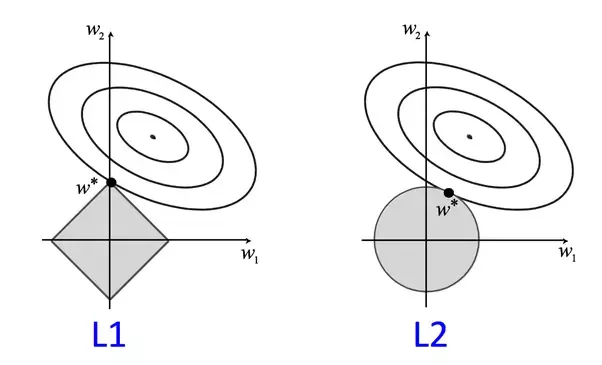

[參考資料](https://medium.com/intuition/understanding-l1-and-l2-regularization-with-analytical-and-probabilistic-views-8386285210fc)

### Elastic Net（彈性網）

如果你希望同時保有：

* L1 的「稀疏性」能力
* L2 的「穩定性」與「數值計算友善性」

可以使用 Elastic Net：

$$
J(\boldsymbol{\theta}) = \text{MSE} + \lambda_1 \sum |\theta_j| + \lambda_2 \sum \theta_j^2
$$

它能在稀疏與穩定之間做出彈性權衡。


### 使用各種線性模型的時機點

| 模型名稱                      | 適合                                               | 不適合                               |
| ------------------------- | ------------------------------------------------------ | -------------------------------------- |
| **Linear Regression**     | - 特徵不多，資料量不大<br>- 特徵與目標呈線性關係明確<br>- 不需要特徵選擇            | - 特徵數量多或易過擬合<br>- 特徵之間有共線性（高度相關）       |
| **L2正規化**      | - 特徵多且彼此可能有關聯<br>- 所有特徵都可能有貢獻<br>- 想限制參數大小以防過擬合        | - 想要自動篩選特徵（Ridge 不會將參數壓成 0）            |
| **L1正規化**      | - 特徵非常多但只有少數重要<br>- 想進行特徵選擇<br>- 需要模型可解釋性              | - 所有特徵都可能重要<br>- 特徵之間強烈相關（可能隨機只保留其中一項） |
| **Elastic Net**           | - 特徵多但部分有用<br>- 特徵可能相關，需兼顧稀疏性與穩定性<br>- 無法單選 L1 或 L2 時  | - 問題結構簡單，使用純 L1 或 L2 即可                |
| **Polynomial Regression** | - 特徵與目標變數呈非線性關係<br>- 資料量中等可控制過擬合<br>- 需要彎曲模型解釋性        | - 高維特徵＋高次項，易造成維度爆炸<br>- 資料雜訊多時容易過擬合    |
| **SVD 解法**                | - 資料量小，可接受完整計算解析解<br>- $X^TX$ 不可逆或條件數差時<br>- 需要數學穩定性分析 | - 資料量大，計算與記憶體成本高<br>- 需支援即時或增量學習場景     |
| **SGD 解法**                | - 大型資料集<br>- 資料需分批載入<br>- 線上學習與快速收斂需求                  | - 小型資料集，closed-form 更快<br>- 對收斂精度有嚴格要求 |



在這種迭代學習演算法正規化的情況下，我們可以驗證誤差到一定的最小值就立即停止訓練，這種作法稱為早期停止（Early Stopping）。

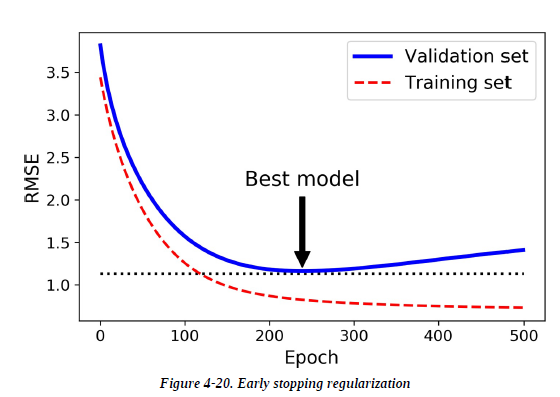

## Logistic Regression